Tip: hit shift-enter after each Python statement to run it

In [1]:
import pandas
from sklearn import svm
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
import seaborn as sns
import numpy as np

Read data from csv file. Just print "raw_data" to see what is inside.

Q: Can you spot the relationship between the numbers and the class?

In [2]:
raw_data = pandas.read_csv('/rodata/exercise01/part3.csv', index_col=None)

raw_data has multiple numbers and a class. The goal is that our ML can learn the class for the numbers.

For that, we need to split them. Class goes into one array, the data to learn (a.k.a. "features" in another)

In [8]:
learn_data = raw_data.copy()
classes = raw_data['class']
del learn_data['class']



In [23]:
# split the data
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Split data into training and test set
features_train, features_test, target_train, target_test = train_test_split(
    learn_data.values, classes, test_size=0.2, random_state=0)

In [12]:
features_train

array([[79, 46, 78, ..., 15, 99, 32],
       [30, 80, 19, ...,  8, 57, 77],
       [17, 50, 59, ..., 20, 50, 47],
       ...,
       [64, 18, 87, ..., 14, 45, 86],
       [59, 80, 86, ..., 94,  5, 44],
       [72, 63, 49, ..., 14, 37, 68]])

We use a Support Vector Classifier

Experiment 1: SVC()

Experiment 2: Use LinearSVC()

Experiment 3: Use LinearSVC() with more data: part3_10k.csv

In [4]:
# try SVC classifier
classifier = svm.SVC(gamma='auto')

Tell the classifier to learn based on reference data

In [14]:
classifier.fit(features_train, target_train)

SVC(gamma='auto')

Q: How good are the predictions of numbers between 1 and 100? Do they match your finding of the relationship?

In [15]:
classifier.predict([ [0, 0, 0, 0, 0, 0, 0, 1] ])

array([0])

In [19]:
# we look at the accuracy score
classifier.score(features_test, target_test)

0.515

In [16]:
attempts = 0
correct = 0
for val in range(1, 100):
    result = classifier.predict([[0, 0, 0, 0, 0, 0, 0, val]])[0]
    if val <= 50 and result == [0]:
        correct += 1
    elif val > 50 and result == [1]:
        correct += 1
    attempts += 1
print('%d of %d trials correct: %f%%' % (correct, attempts, 100.0*correct/attempts))

50 of 99 trials correct: 50.505051%


In [45]:

print(classification_report(target_test, classifier.predict(features_test), 
                            labels = np.unique(classifier.predict(features_test))))

              precision    recall  f1-score   support

           0       0.52      1.00      0.68       103

   micro avg       0.52      1.00      0.68       103
   macro avg       0.52      1.00      0.68       103
weighted avg       0.52      1.00      0.68       103



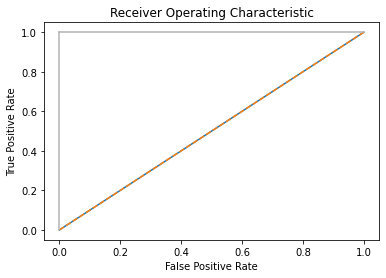

In [46]:
# Get predicted probabilities
target_predict = classifier.predict(features_test)

# Create true and false positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(target_test,
                                                               target_predict)
# Plot ROC curve
plt.title("Receiver Operating Characteristic")
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

Q: How is the decision tree from task 1.2 doing on this task?

##### Now we use Experiment 2: Use LinearSVC()

In [22]:
# try LinearSVC classifier
classifier_lsvc = svm.LinearSVC()

# train the classifier with the train set
classifier_lsvc.fit(features_train, target_train)

# get the score
classifier_lsvc.score(features_test, target_test)

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.925

##### Now Experiment 3: Use LinearSVC() with more data

In [35]:
raw_data3 = pandas.read_csv('/rodata/exercise01/part3_10k.csv', index_col=None)
learn_data3 = raw_data3.copy()
classes3 = raw_data3['class']
del learn_data3['class']

In [36]:
learn_data3.describe

<bound method NDFrame.describe of       number1  number2  number3  number4  number5  number6  number7  number8
0          23       54       36       60       62        6        1       83
1          25       23       99       47       83       47       63       15
2          63       86       52       74       67        6       75       59
3          30        3       86       47       71       87       71       92
4          39       80       44       93       87        9       13       21
...       ...      ...      ...      ...      ...      ...      ...      ...
9995        5       69       80       11       40       19       51        0
9996       32       45       59       69       98        4       67       71
9997       40       48       94       35       25       48       96        7
9998       93        7       97        8       29       49       41       43
9999       59        5       76       88       11       49       21       79

[10000 rows x 8 columns]>

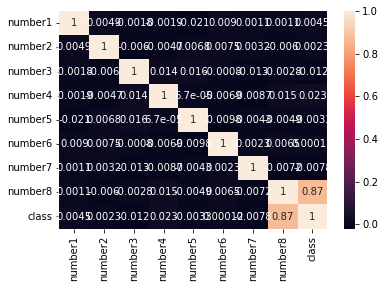

In [39]:
# calculate the correlation matrix
corrMatrix = raw_data3.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

##### The only feature that shows correlation witht the class is column number 8

In [95]:
import warnings
warnings.filterwarnings('ignore')

# Split data into training and test set
features_train3, features_test3, target_train3, target_test3 = train_test_split(
    learn_data3.values, classes3, test_size=0.2, random_state=0)

classifier_lsvc3 = svm.LinearSVC(C=12.0)

# train the classifier with the train set
classifier_lsvc3.fit(features_train3, target_train3)

# get the score
classifier_lsvc.score(features_test3, target_test3)


0.923

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

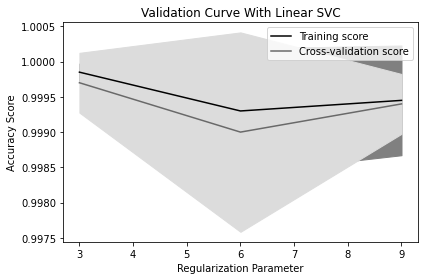

In [93]:
from sklearn.model_selection import validation_curve
from sklearn.svm import LinearSVC

# Create range of values for regularization parameter
param_range = np.arange(0, 10.0, 3)

# Calculate accuracy on training and test set using range of parameter values
train_scores, test_scores = validation_curve(
    # Classifier
    LinearSVC(max_iter=500000),
    # Feature matrix
    learn_data3.values,
    # Target vector
    classes3.values,
    # Hyperparameter to examine
    param_name="C",
    # Range of hyperparameter's values
    param_range=param_range,
    # Number of folds
    cv=3,
    # Performance metric
    scoring="accuracy",
    # Use all computer cores
    n_jobs=-1)

# Calculate mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot mean accuracy scores for training and test sets
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Cross-validation score", color="dimgrey")

# Plot accurancy bands for training and test sets
plt.fill_between(param_range, train_mean - train_std,
                 train_mean + train_std, color="gray")
plt.fill_between(param_range, test_mean - test_std,
                 test_mean + test_std, color="gainsboro")

# Create plot
plt.title("Validation Curve With Linear SVC")
plt.xlabel("Regularization Parameter")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

In [94]:
test_mean

array([       nan, 0.99969997, 0.9990002 , 0.99939997])

#### finally we try a classification tree

[Text(0.5, 0.75, 'number8 <= 50.5\nentropy = 1.0\nsamples = 8000\nvalue = [3980, 4020]'),
 Text(0.25, 0.25, 'entropy = 0.0\nsamples = 3980\nvalue = [3980, 0]'),
 Text(0.75, 0.25, 'entropy = 0.0\nsamples = 4020\nvalue = [0, 4020]')]

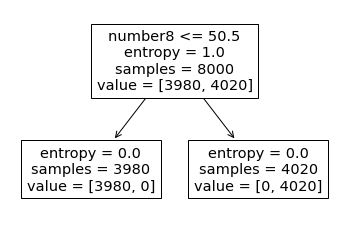

In [47]:
classifier_dt = tree.DecisionTreeClassifier(criterion= 'entropy')
classifier_dt.fit(features_train3, target_train3)
tree.plot_tree(classifier_dt, 
               feature_names=learn_data3.columns)


In [48]:
classifier_dt.score(features_test3, target_test3)

1.0

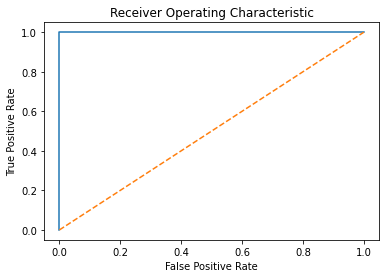

In [56]:
# Get predicted probabilities
target_predict = classifier_dt.predict(features_test3)

# Create true and false positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(y_true = target_test3, y_score = target_predict)

# Plot ROC curve
plt.title("Receiver Operating Characteristic")
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
#plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

/opt/conda/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


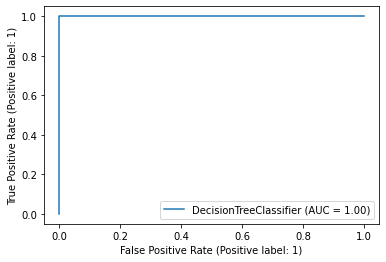

In [66]:
from sklearn import metrics
metrics.plot_roc_curve(classifier_dt, features_test3, target_test3)

In [52]:
from sklearn.metrics import confusion_matrix
predict_test3 = classifier_dt.predict(features_test3)
print (confusion_matrix(target_test3,predict_test3 ))

[[1013    0]
 [   0  987]]
